
<a id='dyn-stack'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Problemas Dinâmicos de Stackelberg

## Conteúdo

- [Problemas Dinâmicos de Stackelberg](#Problemas-Dinâmicos-de-Stackelberg)  
  - [Duopólio](#Duopólio)  
  - [O Problema de Stackelberg](#O-Problema-de-Stackelberg)  
  - [O Plano de Stackelberg](#O-Plano-de-Stackelberg)  
  - [Representação Recursiva do Plano de Stackelberg](#Representação-Recursiva-do-Plano-de-Stackelberg)  
  - [Computando o Plano de Stackelberg](#Computando-o-Plano-de-Stackelberg)  
  - [Exibindo a Inconsistência no Tempo do Plano de Stackelberg](#Exibindo-a-Inconsistência-no-Tempo-do-Plano-de-Stackelberg)  
  - [Formulação Recursiva do Problema do Seguidor](#Formulação-Recursiva-do-Problema-do-Seguidor)  
  - [Equilíbrio Perfeito de Markov](#Equilíbrio-Perfeito-de-Markov)  
  - [MPE vs. Stackelberg](#MPE-vs.-Stackelberg)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

Esse notebook formula e calcula um plano em que o **Líder-Stackelberg** usa para manipular decisões prospectivas de um **Seguidor-Stackelberg** que dependem de sequências de contínuas de decisões tomadas uma vez
e para todos pelo líder-Stackelberg no momento $ 0 $.

Para facilitar a computação e a interpretação, formulamos as coisas em um
contexto que nos permite aplicar a programação dinâmica ótima linear.

Desde o início, carregamos um modelo quadrático-linear de duopólio em
quais empresas enfrentam custos de ajuste que as fazem querer prever
ações de outras empresas que influenciam os preços futuros.

## Duopólio

O tempo é discreto e indexado por $ t = 0, 1, \ldots $.

As duas firmas produzem um único bem cuja a demanda é governada pela curva de demanda linear inversa

$$
p_t = a_0 - a_1 (q_{1t}+ q_{2t} )
$$

onde $ q_{it} $ é a quantidade produzida da firma $ i $ no período $ t $ e
$ a_0 $ e $ a_1 $ são ambos positivos.

$ q_{10}, q_{20} $ são números dados que servem como condições iniciais no tempo $ 0 $.

Ao incorrer em um custo de mudança

$$
\gamma v_{it}^2
$$

onde $ \gamma > 0 $, a firma $ i $ pode alterar sua produção de acordo com:

$$
q_{it+1} = q_{it} + v_{it}
$$

O lucro da firma $ i $ no período $ t $ é igual:

$$
\pi_{it} = p_t q_{it} - \gamma v_{it}^2
$$

A firma $ i $ quer maximizar o valor presente de seus lucros:

$$
\sum_{t=0}^\infty \beta^t \pi_{it}
$$

onde $ \beta \in (0,1) $ é um fator de desconto do tempo.

### Stackelberg Líder e Seguidor

Cada firma $ i=1,2 $ escolhe uma sequência
$ \vec q_i \equiv \{q_{it+1}\}_{t=0}^\infty $ uma vez e para todo o período $ 0 $.

Seja a firma 2 a **Líder-Stackelberg** e a firma 1 a **Seguidora-Stackelberg**.

A líder, firma 2, decide na frente e escolhe
$ \{q_{2t+1}\}_{t=0}^\infty $ uma vez e para todo o período $ 0 $.

Sabendo o que a firma 2 tem escolhido $ \{q_{2t+1}\}_{t=0}^\infty $, a firma, seguidora, 1 decide posteriormente e escolhe
$ \{q_{1t+1}\}_{t=0}^\infty $ uma vez e para todo o período $ 0 $.

Na escolha de $ \vec q_2 $, a firma 2 leva em consideração que a firma 1
baseie sua escolha de $ \vec q_1 $ na escolha da empresa 2
$ \vec q_2 $.

### Afirmação Abstrata do Problema da Seguidora e da Líder

Podemos expressar o problema da firma 1 como:

$$
\max_{\vec q_1} \Pi_1(\vec q_1; \vec q_2)
$$

onde a aparência atrás do ponto e vírgula indica que
$ \vec q_2 $ é dada.

O problema da firma 1 induz um melhor mapeamento da resposta

$$
\vec q_1 = B(\vec q_2)
$$

(Aqui $ B $ traça uma sequência em uma sequência)

O problema da Líder é:

$$
\max_{\vec q_2} \Pi_2 (B(\vec q_2), \vec q_2)
$$

cujo maximizador é uma sequência $ \vec q_2 $ que depende das condições iniciais $ q_{10}, q_{20} $ e dos parâmetrods do modelo $ a_0, a_1, \gamma $.

Esta formulação captura os principais recursos do modelo:

- Ambas as empresas fazem escolhas de uma vez por todas ao mesmo tempo $ 0 $.  
- Isso é verdade mesmo que as duas empresas estejam escolhendo sequências de
  quantidades indexadas pelo **tempo**.  
- O líder de Stackelberg escolhe primeiro **dentro do tempo** $ 0 $,
  sabendo que o seguidor de Stackelberg escolherá em segundo **dentro do tempo** $ 0 $.  


Embora nossa formulação abstrata revele o protocolo de temporização e
conceito de equilíbrio, obscurece detalhes que devem ser abordados
quando queremos calcular e interpretar um plano Stackelberg e a
melhor resposta da seguidora a ele.

Para obter informações sobre essas coisas, as estudamos com mais detalhes.

### Problema das Firmas

A firma 1 age como se a sequência da firma 2 $ \{q_{2t+1}\}_{t=0}^\infty $ seja
dada e fora de seu controle.

A firma 2 sabe que a firma 1 escolhe posteriormente e leva isso em consideração
escolhendo $ \{q_{2t+1}\}_{t=0}^\infty $.

O espírito de *working backwards*, estudamos o problema da firma 1 primeiro,
levando $ \{q_{2t+1}\}_{t=0}^\infty $ como dado.

Podemos formular o problema ideal da firma 1 em termos do Lagrangiano:

$$
L=\sum_{t=0}^{\infty}\beta^{t}\{a_{0}q_{1t}-a_{1}q_{1t}^{2}-a_{1}q_{1t}q_{2t}-\gamma v_{1t}^{2}+\lambda_{t}[q_{1t}+v_{1t}-q_{1t+1}]\}
$$

A firma 1 busca o máximo em relação a
$ \{q_{1t+1}, v_{1t} \}_{t=0}^\infty $ e um mínimo com respeito a 
$ \{ \lambda_t\}_{t=0}^\infty $.

Abordamos esse problema usando os métodos descritos em Ljungqvist e
Sargent RMT5 capítulo 2, apêndice A e Teoria Macroeconômica, 2º
edição, capítulo IX.

As condições de primeira ordem para esse problema são:

$$
\begin{aligned}
\frac{\partial L}{\partial q_{1t}} & = a_0 - 2 a_1 q_{1t} - a_1 q_{2t} + \lambda_t - \beta^{-1}
             \lambda_{t-1} = 0 , \quad t \geq 1 \cr
             \frac{\partial L}{\partial v_{1t}} & = -2 \gamma v_{1t} +  \lambda_t = 0 , \quad t \geq 0
 \end{aligned}
$$

Essas condições de primeira ordem e a restrição $ q_{1t+1} = q_{1t} + v_{1t} $ podem ser reorganizadas para tomarem a forma:

$$
\begin{aligned}
v_{1t} & = \beta v_{1t+1} + \frac{\beta a_0}{2 \gamma} - \frac{\beta a_1}{\gamma} q_{1t+1} -
                      \frac{\beta a_1}{2 \gamma} q_{2t+1} \cr
            q_{t+1} & = q_{1t} + v_{1t}
\end{aligned}
$$

Podemos substituir a segunda equação dentro da primeira equação para obtermos:

$$
(q_{1t+1} - q_{1t} ) = \beta (q_{1t+2} - q_{1t+1}) + c_0 - c_1 q_{1t+1} - c_2 q_{2t+1}
$$

onde
$ c_0 = \frac{\beta a_0}{2 \gamma}, c_1 = \frac{\beta a_1}{\gamma}, c_2 = \frac{\beta a_1}{2 \gamma} $.

Essa equação pode, por sua vez, ser reorganizada para se tornar a equação de diferença de segunda ordem:



<a id='equation-sstack1'></a>
$$
q_{1t} + (1+\beta + c_1) q_{1t+1} - \beta q_{1t+2} = c_0 - c_2 q_{2t+1} \tag{1}
$$

A equação [(1)](#equation-sstack1) é uma equação de diferenca de segunda ordem na sequência
$ \vec q_1 $ cuja solução queremos.

Satisfazendo as **duas condições de contorno:**

- uma condição inicial $ q_{1,0} $, que é dada 
- uma condição terminal exigindo que
  $ \lim_{T \rightarrow + \infty} \beta^T q_{1t}^2 < + \infty $  


Usando operadores defasagens descritos no capítulo IX de *Macroeconomic
Theory, Second edition (1987)*, a equação da diferença
[(1)](#equation-sstack1) pode ser escrita como:

$$
\beta(1 - \frac{1+\beta + c_1}{\beta} L + \beta^{-1} L^2 ) q_{1t+2} = - c_0 + c_2 q_{2t+1}
$$

O polinômio no operador defasagem no lado esquerdo pode ser **fatorado**
como:


<a id='equation-sstack2'></a>
$$
(1 - \frac{1+\beta + c_1}{\beta} L + \beta^{-1} L^2 )  = ( 1 - \delta_1 L ) (1 - \delta_2 L) \tag{2}
$$

onde $ 0 < \delta_1 < 1 < \frac{1}{\sqrt{\beta}} < \delta_2 $.

Porque $ \delta_2 > \frac{1}{\sqrt{\beta}} $ o operador
$ (1 - \delta_2 L) $ contribui com um componente **instável** se resolvido
**para trás**, mas um componente **estável** se resolvido **para frente**.

Macânicamente, escrevemos

$$
(1- \delta_2 L) = -\delta_{2} L (1 - \delta_2^{-1} L^{-1} )
$$

e calcule o seguinte operador inverso

$$
\left[-\delta_{2} L (1 - \delta_2^{-1} L^{-1} )\right]^{-1} = - \delta_2 (1 - {\delta_2}^{-1} )^{-1} L^{-1}
$$

Operando nos dois lados da equação [(2)](#equation-sstack2) com
$ \beta^{-1} $ vezes esse operador inverso temos a regra de decisão da firma seguidora definindo $ q_{1t+1} $ na forma
**feedback-feedforward**:


<a id='equation-sstack3'></a>
$$
q_{1t+1} = \delta_1 q_{1t} - c_0 \delta_2^{-1} \beta^{-1}  \frac{1}{1 -\delta_2^{-1}}  + c_2 \delta_2^{-1} \beta^{-1} \sum_{j=0}^\infty \delta_2^j q_{2t+j+1} ,  \quad t \geq 0 \tag{3}
$$

O problema da firma líder 2 é escolher uma sequência
$ \{q_{2t+1}\}_{t=0}^\infty $ para maximizar seus lucros descontados

$$
\sum_{t=0}^\infty \beta^t \{ (a_0 -  a_1 (q_{1t} + q_{2t}) ) q_{2t} - \gamma (q_{2t+1} - q_{2t})^2 \}
$$

sujeito a uma sequência de restrições [(3)](#equation-sstack3) para $ t \geq 0 $.

Podemos colocar uma sequência $ \{\theta_t\}_{t=0}^\infty $ de multiplicadores de Lagrange
na sequência de equações [(3)](#equation-sstack3)
e formular o seguinte lagrangeano para o problema da  firma líder 2

<a id='equation-sstack4'></a>
$$
\begin{aligned}
\tilde L & = \sum_{t=0}^\infty  \beta^t\{ (a_0 -  a_1 (q_{1t} + q_{2t}) ) q_{2t} - \gamma (q_{2t+1} - q_{2t})^2 \} \cr
 &  + \sum_{t=0}^\infty \beta^t \theta_t \{ \delta_1 q_{1t} -  c_0 \delta_2^{-1} \beta^{-1}  \frac{1}{1 -\delta_2^{-1}} +  c_2 \delta_2^{-1} \beta^{-1}
   \sum_{j=0}^\infty \delta_2^{-j} q_{2t+j+1} - q_{1t+1}
\end{aligned} \tag{4}
$$

sujeito as condições iniciais para $ q_{1t}, q_{2t} $ em $ t=0 $.

**Comentários:** Nós formulamos o problema de Stackelberg em um espaço de
sequências.

O problema *max-min* associado ao Lagrangiano
[(4)](#equation-sstack4) é desagradável porque o tempo $ t $
componente da função de *payoff* da firma $ 1 $ depende de todo
futuro de suas escolhas de $ \{q_{1t+j}\}_{j=0}^\infty $.

Isso torna um ataque direto ao problema complicado.

Portanto, abaixo, formularemos o problema da líder.

Vamos colocar nosso pequeno modelo de duopólio em uma classe mais ampla de modelos com
a mesma estrutura conceitual.

## O Problema de Stackelberg

Formulamos uma classe de problemas quadrático-linear de Stackelberg seguidor-líder
dos quais nosso modelo de duopólio é uma instância.

Usamos o regulador linear ideal (também conhecido como dinâmica quadrático-linear)
problema de programação descrito em [Problemas de programação Dinâmica QL](https://lectures.quantecon.org/py/lqcontrol.html)) para representar o problema da firma líder recursivamente.

Seja $ z_t $ um vetor $ n_z \times 1 $ de **variáveis de estado naturais**.

Seja $ x_t $ um vetor endógeno $ n_x \times 1 $ de
variáveis prospectivas fisicamente livres para saltar para $ t $.

Em nosso exemplo de duopólio $ x_t = v_{1t} $, no período $ t $ a decisão do **seguidor** de Stackelberg.

Seja $ u_t $ ser um vetor de decisões escolhidas pela líder em $ t $.

O vetor $ z_t $ é herdado fisicamente do passado.

Mas $ x_t $ é uma decisão feita pela seguidora no período
$ t $ essa é a melhor resposta da seguidora para a escolha de um conjunto de sequências de decisões tomadas pela líder no momento
$ t=0 $.

Seja

$$
y_t = \begin{bmatrix} z_t \\ x_t \end{bmatrix}
$$

Representar a função de perda de um período da firma líder como:

$$
r(y, u)  =  y' R y  + u' Q u
$$

Sujeito a uma condição inicial para $ z_0 $, mas não para $ x_0 $, a firma líder de Stackelberg que maximizar:


<a id='equation-maxeq'></a>
$$
-\sum_{t=0}^\infty \beta^t r(y_t, u_t) \tag{5}
$$

A firma líder enfrenta o modelo:


<a id='equation-new2'></a>
$$
\begin{bmatrix} I & 0 \\ G_{21} & G_{22} \end{bmatrix}
\begin{bmatrix}    z_{t+1} \\  x_{t+1} \end{bmatrix}
= \begin{bmatrix}  \hat A_{11}  &  \hat A_{12} \\ \hat A_{21} & \hat A_{22}  \end{bmatrix} \begin{bmatrix}  z_t \\ x_t \end{bmatrix} + \hat B u_t \tag{6}
$$

Assumimos que a matriz
$ \begin{bmatrix} I & 0 \\ G_{21} & G_{22} \end{bmatrix} $ no lado esquerdo da equação [(6)](#equation-new2) é invertível, de modo que podemos multiplicar ambos os lados por sua inversa para obter:


<a id='equation-new3'></a>
$$
\begin{bmatrix}    z_{t+1} \\  x_{t+1} \end{bmatrix}
= \begin{bmatrix}  A_{11}  &   A_{12} \\ A_{21} &  A_{22}  \end{bmatrix}
\begin{bmatrix}  z_t \\ x_t \end{bmatrix} +  B u_t \tag{7}
$$

ou


<a id='equation-constrainteq'></a>
$$
y_{t+1} = A y_t + B u_t \tag{8}
$$

### Interpretação do Segundo Bloco de Equações

O melhor de resposta da firma seguidor  está resumido pelo
segundo bloco de equações de [(7)](#equation-new3).

Em particular, essas equações são condições de primeira ordem da otimização do problema da firma seguidora (ou seja, suas equações de Euler).

Essas equações de Euler resumum o aspecto prospectivo do
comportamento da seguidora e expressa como seu tempo $ t $  de decisão depende de
as ações da líder em períodos $ s \geq t $.

Quando combinado com uma condição de estabilidade a ser imposta abaixo, as equações de Euler resumem a melhor resposta da seguidora à sequência de ações da líder.

O líder de Stackelberg maximiza [(5)](#equation-maxeq) escolhendo as sequências $ \{u_t, x_t, z_{t+1}\}_{t=0}^{\infty} $
sujeitas a [(8)](#equation-constrainteq) e uma condição inicial para $ z_0 $.

Observe que temos uma condição inicial para $ z_0 $ mas não para $ x_0 $.

$ x_0 $ está entre as variáveis a serem escolhidas no momento $ 0 $ pela firma Líder de Stackelberg.

O líder de Stackelberg usa seu entendimento das respostas
restritas por [(8)](#equation-constrainteq) para manipular as decisões da seguidora.

### Mais Detalhes Mecânicos

Para qualquer vetor $ a_t $, defina $ \vec a_t = [a_t,
a_{t+1} \ldots ] $.

Defina um conjunto de sequências factíveis $ (\vec y_1, \vec u_0): $

$$
\Omega(y_0) = \left\{ (\vec y_1, \vec u_0) :  y_{t+1} = A y_t + B u_t, \forall t \geq 0 \right\}
$$

Lembre-se que a Equação de Euler da seguidora está incorporada no
sistema de equações dinâmicas $ y_{t+1} = A y_t + B u_t $.

Perceba que na definição de $ \Omega(y_0) $, $ y_0 $
é tomado como dado

Embora seja considerado como indicado em $ \Omega (y_0) $,
eventualmente, o componente $ x_0 $ de $ y_0 $ será escolhido pela firma
Líder.

### Dois Subproblemas

Mais uma vez usamos indução retroativa.

Expressamos o problema de Stackelberg em termos de **dois subproblemas**.

O subproblema 1 é resolvido por uma **continuação do líder de Stackelberg** em cada
período $ t \geq 0 $.

O subproblema 2 é resolvido com o **líder Stackelberg** em $ t = 0 $.

Os dois subproblemas são projetados:

- Para respeitar o protocolo em que o seguidor escolhe
  $ \vec q_1 $ depois de ver $ \vec q_2 $ escolhido pelo líder;
- Para fazer o líder escolher $ \vec q_2 $ respeitando isso
  $ \vec q_1 $ será a melhor resposta do seguidor para
  $ \vec q_2 $, e  
- Para representar o problema do líder recursivamente, escolhendo com astúcia
  as variáveis de estado confrontadas e as variáveis de controle disponíveis
  para o líder.

#### Subproblema 1

$$
v(y_0) = \max_{(\vec y_1, \vec u_0) \in \Omega(y_0)} - \sum_{t=0}^\infty \beta^t r(y_t, u_t)
$$

#### Subproblema 2

$$
w(z_0) = \max_{x_0} v(y_0)
$$

O subproblem 1 pega o vetor de variáveis prospectivas $ x_0 $ como dado.

O subproblem 2 otimiza sobre $ x_0 $.

A função de valor $ w(z_0) $ informa o valor do plano Stackelberg
em função do vetor de variáveis de estado natural no tempo $ 0 $,
$ z_0 $.

### Duas Equações de Bellman

Agora descreveremos as equações de Bellman para $ v(y) $ e $ w(z_0) $.

#### Subproblema 1

A função de valor $ v(y) $ no subproblema 1 satisfaz a equação de Bellman



<a id='equation-bellman-stack'></a>
$$
v(y) = \max_{u, y^*}  \left\{ - r(y,u) + \beta v(y^*) \right\} \tag{9}
$$

onde a maximização está sujeito a:

$$
y^* = A y + B u
$$

e $ y^* $ denota o valor do próximo período.

Substituindo $ v(y) = - y'P y $ na equação de Bellman [(9)](#equation-bellman-stack) temos

$$
-y' P y = {\rm max}_{  u, y^*} \left\{ -  y' R y -   u'Q     u - \beta y^{* \prime} P y^* \right\}
$$

que como na aula [regulador linear](https://lectures.quantecon.org/py/lqcontrol.html) dá
ascensão à matriz algébrica equação de Riccati

$$
P = R + \beta A' P A - \beta^2 A' P   B (  Q  + \beta   B' P   B)^{-1}   B' P A
$$

e o vetor coeficiente de regra de decisão ideal

$$
F = \beta(   Q + \beta   B' P   B)^{-1}  B' P A
$$

onde a decisão ótima é

$$
u_t = - F y_t
$$

#### Subproblema 2

Encontramos um ótimo $ x_0 $ equiparando a zero o gradiente de $ v(y_0) $
com respeito a $ x_0 $:

$$
-2 P_{21} z_0 - 2 P_{22} x_0 =0,
$$

que implica que

$$
x_0 = - P_{22}^{-1} P_{21} z_0
$$

## O Plano de Stackelberg

Agora vamos traçar nosso modelo de duopólio na configuração acima.

Vamos formular um sistema de espaço de estado

$$
y_t = \begin{bmatrix} z_t \cr x_t \end{bmatrix}
$$

onde nesse caso $ x_t = v_{1t} $, o período $ t $ é a decisão
da firma seguidora 1.

### Calculos para Preparar o Modelo de Duopólio

Agora, vamos lançar nosso modelo de duopólio dentro da estrutura do
estrutura linear-quadrática mais geral descrita acima.

Isso nos permitirá calcular um plano Stackelberg simplesmente recrutando um
Equação de Riccati para resolver um programa dinâmico quadrático-linear.

Como enfatizado acima, a firma 1 age como se as decisões da firma 2
$ \{q_ {2t + 1}, v_ {2t} \} _ {t = 0} ^ \infty $ são dadas e além de seus
ao controle.

### Problema da Firma 1

Mais uma vez formulamos o problema ótimo da firma 1 em termo de Lagrangeano

$$
L=\sum_{t=0}^{\infty}\beta^{t}\{a_{0}q_{1t}-a_{1}q_{1t}^{2}-a_{1}q_{1t}q_{2t}-\gamma v_{1t}^{2}+\lambda_{t}[q_{1t}+v_{1t}-q_{1t+1}]\}
$$

A firma 1 busca o máximo em relação a
$ \{q_{1t+1}, v_{1t} \}_{t=0}^\infty $ e um mínimo com respeito a
$ \{ \lambda_t\}_{t=0}^\infty $.

As condições de primeira ordem para esse problema são:

$$
\begin{aligned}
\frac{\partial L}{\partial q_{1t}} & = a_0 - 2 a_1 q_{1t} - a_1 q_{2t} + \lambda_t - \beta^{-1}
             \lambda_{t-1} = 0 , \quad t \geq 1 \cr
             \frac{\partial L}{\partial v_{1t}} & = -2 \gamma v_{1t} +  \lambda_t = 0 , \quad t \geq 0
 \end{aligned}
$$

Essas condições de ordem de primeira ordem e a restrição $ q_{1t+1} =
q_{1t} + v_{1t} $ podem ser reorganizadas para tomar a forma:

$$
\begin{aligned}
v_{1t} & = \beta v_{1t+1} + \frac{\beta a_0}{2 \gamma} - \frac{\beta a_1}{\gamma} q_{1t+1} -
                      \frac{\beta a_1}{2 \gamma} q_{2t+1} \cr
            q_{t+1} & = q_{1t} + v_{1t}
\end{aligned}
$$

Usamos essas duas equações como componentes do seguinte sistema linear
que confronta uma continuação do lider de Stackelberg no momento $ t $

$$
\begin{bmatrix}       1 & 0 & 0 & 0 \cr
                       0 & 1 & 0 & 0 \cr
                       0 & 0 & 1 & 0 \cr
       \frac{\beta a_0}{2 \gamma} & - \frac{\beta a_1}{2 \gamma} & -\frac{\beta a_1}{\gamma} & \beta \end{bmatrix}
       \begin{bmatrix} 1 \cr q_{2t+1} \cr q_{1t+1} \cr v_{1t+1} \end{bmatrix}
       = \begin{bmatrix} 1 & 0 & 0 & 0 \cr
                         0 & 1 & 0 & 0 \cr
                          0 & 0 & 1 & 1 \cr
                          0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t} \cr v_{1t} \end{bmatrix}
       + \begin{bmatrix} 0 \cr 1 \cr 0 \cr 0 \end{bmatrix} v_{2t}
$$

No período $ t $ as receitas da empresa 2 são
$ \pi_{2t} = a_0 q_{2t} - a_1 q_{2t}^2 - a_1 q_{1t} q_{2t} $  na qual
evidentemente igual

$$
z_t' R_1 z_t \equiv \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t}  \end{bmatrix}'
   \begin{bmatrix} 0 & \frac{a_0}{2}& 0 \cr
                   \frac{a_0}{2} & -a_1 & -\frac{a_1}{2}\cr
                   0 & -\frac{a_1}{2} & 0 \end{bmatrix}
\begin{bmatrix} 1 \cr q_{2t} \cr q_{1t}  \end{bmatrix}
$$

Se definirmos $ Q = \gamma $, então os lucros da firma 2 no período $ t $ podem ser escritos:

$$
y_t' R y_t - Q v_{2t}^2
$$

onde 

$$
y_t = \begin{bmatrix} z_t \cr x_t \end{bmatrix}
$$

com $ x_t = v_{1t} $ e

$$
R =
\begin{bmatrix} R_1 & 0 \cr 0 & 0 \end{bmatrix}
$$

Relataremos os resultados da implementação deste código em breve.

Mas primeiro queremos representar as melhores opções do líder de Stackelberg
recursivamente.

É importante fazer isso por vários motivos:
- interpretar adequadamente uma representação da escolha dos líderes de Stackelberg
   como uma sequência de funções dependentes da história
- formular uma versão recursiva do problema de escolha do seguidor


Primeiro, vamos obter uma representação recursiva da escolha do líder de Stackelberg
 de $ \vec q_2 $ para o nosso modelo de duopólio.

## Representação Recursiva do Plano de Stackelberg

Para obter uma representação adequada do plano de Stackelberg
dependente do passado do líder, empregaremos o que equivale a um
versão do dispositivo **Grande K, pequeno k** frequentemente usado em
macroeconomia, distinguindo $ z_t $, que depende em parte da
decisões $ x_t $ dos seguidores, de outro vetor
$ \check z_t $, o que não acontece.

Usaremos $ \check z_t $ e seu histórico $ \check z^t
= [\check z_t, \check z_{t-1}, \ldots, \check z_0] $ para descrever a sequência de decisões do Líder de Stackelbeg que o seguidor de Stackelberg toma como dado.

Então, seja
$ \check y_t' = \begin{bmatrix}\check z_t' & \check x_t'\end{bmatrix} $
com condições iniciais $ \check z_0 = z_0 $ como dadas.

Que distinguimos $ \check z_t $ a partir de $ z_t $ faz parte e
parcela do dispositivo neste
instância **Grande K, pequeno k**. 

Mostramos que o plano de Stackelberg
$ \{u_t\}_{t=0}^\infty $ possui uma representação recursiva

$$
\begin{aligned}
\check x_0 & = - P_{22}^{-1} P_{21} z_0 \cr
            u_t & = - F \check y_t, \quad t \geq 0 \cr
            \check y_{t+1} & = (A - BF) \check y_t, \quad t \geq 0
\end{aligned}
$$

A partir dessa representação, podemos deduzir a sequência de funções 
$ \sigma = \{\sigma_t(\check z^t)\}_{t=0}^\infty $ que compreendem um plano de Stackelberg.

Por conveniência, seja $ \check A \equiv A - BF $ e a partição
$ \check A $ conforme com a partição
$ y_t = \begin{bmatrix}\check z_t \cr \check x_t \end{bmatrix} $ como

$$
\begin{bmatrix}\check A_{11} & \check A_{12} \cr \check A_{21} & \check A_{22} \end{bmatrix}
$$

Let $ H^0_0 \equiv - P_{22}^{-1} P_{21} $ so that
$ \check x_0 = H^0_0 \check z_0 $.

Então iterações em $ \check y_{t+1} = \check A \check y_t $ começando nas condições iniciais $ \check y_0 = \begin{bmatrix}\check z_0 \cr H^0_0 \check z_0\end{bmatrix} $
implicam que para $ t \geq 1 $

$$
x_t = \sum_{j=1}^t H_j^t \check z_{t-j}
$$

onde

$$
\begin{aligned}
H^t_1 & = \check A_{21} \cr
            H^t_2 & = \check A_{22} \check A_{21} \cr
           \ \   \vdots \  \  &  \  \ \quad \vdots \cr
           H^t_{t-1} & = \check A_{22}^{t-2} \check A_{21} \cr
            H^t_t & = \check A_{22}^{t-1}(\check A_{21} + \check A_{22} H^0_0 )
 \end{aligned}
$$

Uma regra de decisão ideal para a escolha de $ u_t $ é

$$
u_t  = - F \check y_t \equiv - \begin{bmatrix} F_z & F_x \cr \end{bmatrix}
\begin{bmatrix}\check z_t \cr x_t \cr \end{bmatrix}
$$

ou 

<a id='equation-finalrule'></a>
$$
u_t  = - F_z \check z_t - F_x \sum_{j=1}^t H^t_j z_{t-j} = \sigma_t(\check z^t) \tag{10}
$$

A representação [(10)](#equation-finalrule) confirma que sempre que
$ F_x \neq 0 $, a situação típica, no tempo $ t $ o componente
$ \sigma_t $ de um plano Stackelberg é **dependente do histórico**, o que significa
que a escolha do líder Stackelberg $ u_t $ depende não apenas de
$ \check z_t $, mas nos componentes de $ \check z ^ {t-1} $.

### Comentários e Interpretações

Depois de tudo, no fim do dia, acontece que, porque definimos
$ \check z_0 = z_0 $, será verdade que $ z_t = \check z_t $
para todo $ t \geq 0 $.

Então, por que distinguimos $ \check z_t $ a partir de $ z_t $?

A resposta é que, se queremos apresentar a **seguidora** de Stackelberg
uma representação dependente do histórico da
sequência $ \vec q_2 $ do **lider** de Stackelberg, devemos usar a representação
[(10)](#equation-finalrule) expressada em termos do histórico
$ \check z^t $ e **não** uma representação correspondente expressada em
termos de $ z^t $.

### Programação Dinâmica e Consistência de tempo do Problema da **Seguidora**

Dada a sequência $ \vec q_2 $ escolhida pela líder em nosso modelo de duopólio, acontece que o problema da **seguidora**
é recursiva nas variáveis de estado *natural* que confrontam um seguidor a qualquer período $ t \geq 0 $.

Isso significa que o plano da firma seguidora é consistente no tempo.

Para verificar essas afirmações, formularemos uma versão recursiva do problema do seguidor que se baseia em nossa representação recursiva do
Plano da firma Líder e nosso uso da ideia de **grande K, pequeno k**.

### Formulação Recursiva do Problema da Seguidora

Agora, usamos o que equivale a outro truque "Grande $ K $, pequeno $ k $" (consulte
[equilíbrio das expectativas racionais](https://lectures.quantecon.org/py/rational_expectations.html))
para formular uma versão recursiva do problema da seguidora expressa em termos de uma equanção de Bellman ordinária. 

A Firma 1, a seguidora, enfrenta $ \{q_{2t}\}_{t=0}^\infty $ Como
uma determinada sequência de quantidade escolhida pela líder e acredita que sua
preço de saída em $ t $ satisfaz

$$
p_t  = a_0 - a_1 ( q_{1t} + q_{2t})  , \quad t \geq 0
$$

Nosso desafio e representar $ \{q_{2t}\}_{t=0}^\infty $ como uma sequência dada.

Para fazer isso, lembre-se de que, no plano Stackelberg, a firma 2 define a produção
de acordo com $ q_{2t} $ componente de:

$$
y_{t+1} = \begin{bmatrix}  1 \cr q_{2t} \cr q_{1t} \cr x_t \end{bmatrix}
$$

que é governado por

$$
y_{t+1} = (A - BF) y_t
$$

Para obter uma formulação recursiva de uma sequência $ \{q_{2t}\} $ que é exógena a firma 1, definimos um estado $ \tilde y_t $

$$
\tilde y_t = \begin{bmatrix}  1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \end{bmatrix}
$$

que evolue de acordo com:

$$
\tilde y_{t+1} = (A - BF) \tilde y_t
$$

sujeito a condição inicial $ \tilde q_{10} = q_{10} $ e
$ \tilde x_0 = x_0 $ onde $ x_0 = - P_{22}^{-1} P_{21} $ como afirmado acima.

O vetor de estado da firma 1 é:

$$
X_t = \begin{bmatrix} \tilde y_t \cr q_{1t}  \end{bmatrix}
$$

Segue-se que a firma seguidora 1 enfrenta a lei do movimento:


<a id='equation-law-motion'></a>
$$
\begin{bmatrix} \tilde y_{t+1} \\
q_{1t+1} \end{bmatrix} = \begin{bmatrix} A - BF & 0 \\
0  & 1 \end{bmatrix}  \begin{bmatrix} \tilde y_{t} \\
q_{1t} \end{bmatrix} + \begin{bmatrix} 0 \cr 1 \end{bmatrix} x_t \tag{11}
$$

Essa especificação assegura que, do ponto de vista de uma firma 1,
$ q_ {2t} $ é um processo exógeno.


Aqui

- $ \tilde q_{1t}, \tilde x_t $ assume o papel de **Grande K**.  
- $ q_{1t}, x_t $ assume o papel de **pequeno k**.  


O período $ t $ componente do objetivo da firma 1 é:

$$
\tilde X_t' \tilde R x_t - x_t^2 \tilde Q = \begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \cr q_{1t} \end{bmatrix}'
 \begin{bmatrix} 0 & 0 & 0 & 0 & \frac{a_0}{2} \cr
                 0 & 0 & 0 & 0 & - \frac{a_1}{2} \cr
                 0 & 0 & 0 & 0 & 0 \cr
                 0 & 0 & 0 & 0 & 0 \cr
                 \frac{a_0}{2} &  -\frac{a_1}{2} & 0 & 0 & - a_1 \end{bmatrix}
 \begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \cr q_{1t} \end{bmatrix} - \gamma
    x_t^2
$$

A regra de decisão ideal da firma 1 é:

$$
x_t = - \tilde F X_t
$$

e seu estado evolui de acordo com

$$
\tilde X_{t+1} = (\tilde A - \tilde B \tilde F) X_t
$$

sobre sua regra de decisão ideal.

Mais tarde devemos computar $ \tilde F $ e verificar que quando definimos:

$$
X_0 = \begin{bmatrix} 1 \cr q_{20} \cr  q_{10} \cr  x_0 \cr q_{10} \end{bmatrix}
$$

nós recuperamos

$$
x_0 = - \tilde F \tilde X_0
$$

que verificará se configuramos corretamente um recurso recursivo da
representação do problema do seguidor diante do líder no modelo de Stackelberg
$ \vec q_2 $.

### Consistência de Tempo do Plano do Seguidor

Como o seguidor pode resolver seu problema usando a programação dinâmica, sua
o problema é recursivo, para que são as **variáveis de estado natural**,
nomeadamente

$$
\begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{10} \cr \tilde x_0   \end{bmatrix}
$$

Segue-se que o plano do seguidor é consistente no tempo.

## Computando o Plano de Stackelberg

Aqui está o nosso código para computarmos o Plano de Stackelberg via programção dinâmica quadrática linear
conforme descrito acima.

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using QuantEcon, Plots, LinearAlgebra, Statistics, Parameters, Random

Nos definimos tuplas nomeadas e valores padrão para as configurações do modelo e do solucionador, e
fundamentar uma cópia de cada.

In [3]:
model = @with_kw (a0 = 10,
                  a1 = 2,
                  β = 0.96,
                  γ = 120.,
                  n = 300)

# coisas como tolerâncias etc.
settings = @with_kw (tol0 = 1e-8,
                     tol1 = 1e-16,
                     tol2 = 1e-2)

defaultModel = model();
defaultSettings = settings();

Agora podemos calcular a política atual usando a rotina `LQ routine` disponível em QuantEcon.jl

In [4]:
@unpack a0, a1, β, γ, n = defaultModel
@unpack tol0, tol1, tol2 = defaultSettings

βs = [β^x for x = 0:n-1]
Alhs = I + zeros(4, 4);
Alhs[4, :] = [β * a0 / (2 * γ), -β * a1 / (2 * γ), -β * a1 / γ, β] # coeficientes das Equações de Euler
Arhs = I + zeros(4, 4);
Arhs[3, 4] = 1.;
Alhsinv = inv(Alhs);

A = Alhsinv * Arhs;
B = Alhsinv * [0, 1, 0, 0,];
R = [0 -a0/2 0 0; -a0/2 a1 a1/2 0; 0 a1/2 0 0; 0 0 0 0];
Q = γ;
lq = QuantEcon.LQ(Q, R, A, B, bet=β);
P, F, d = stationary_values(lq)

P22 = P[4:end, 4:end];
P21 = P[4:end, 1:3];
P22inv = inv(P22);
H_0_0 = -P22inv * P21;

# simular para a frente
π_leader = zeros(n);
z0 = [1, 1, 1];
x0 = H_0_0 * z0;
y0 = vcat(z0, x0);

Random.seed!(1) # para reprodutibilidade
yt, ut = compute_sequence(lq, y0, n);
π_matrix = R + F' * Q * F;

for t in 1:n
    π_leader[t] = -(yt[:, t]' * π_matrix * yt[:, t]);
end

println("Computed policy for Stackelberg leader: $F")

Computed policy for Stackelberg leader: [-1.5800445387726552 0.294613127470314 0.6748093760774969 6.539705936147513]


### Séries temporais implícitas para preço e quantidades

O código seguinte plota preços e quantidades.

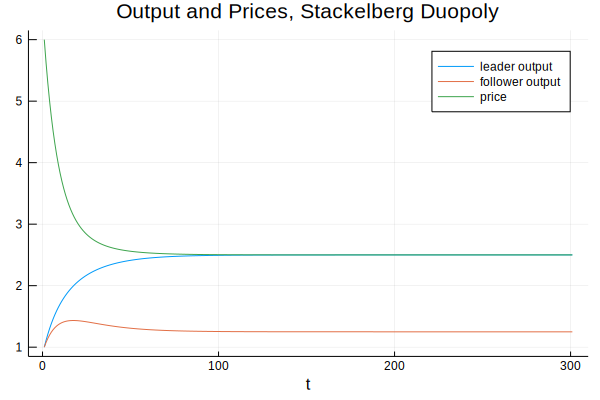

In [5]:
q_leader = yt[2, 1:end];
q_follower = yt[3, 1:end];
q = q_leader + q_follower;
p = a0 .- a1*q;

plot(1:n+1, [q_leader, q_follower, p],
    title = "Output and Prices, Stackelberg Duopoly",
    labels = ["leader output", "follower output", "price"],
    xlabel = "t")

### Valor do Líder de Stackelberg

Calcularemos o valor presente ganho pelo líder.

Vamos calcular de duas maneiras (elas dão respostas idênticas - apenas uma verificação
sobre codificação e pensamento)

In [6]:
v_leader_forward = sum(βs .* π_leader);
v_leader_direct = -yt[:, 1]' * P * yt[:, 1];

println("v_leader_forward (forward sim) is $v_leader_forward")
println("v_leader_direct is $v_leader_direct")

v_leader_forward (forward sim) is 150.0316212532548
v_leader_direct is 150.03237147548847


In [7]:
# manualmente verifique se P é um ponto fixo aproximado
P_next = (R + F' * Q * F + β * (A - B * F)' * P * (A - B * F));
all(P - P_next .< tol0)

true

In [8]:
# verifique manualmente se há duas maneiras diferentes de calcular o
# função value fornece aproximadamente a mesma resposta
v_expanded = -((y0' * R * y0 + ut[:, 1]' * Q * ut[:, 1] +
           β * (y0' * (A - B * F)' * P * (A - B * F) * y0)));
(v_leader_direct - v_expanded < tol0)[1, 1]

true

## Exibindo a Inconsistência no Tempo do Plano de Stackelberg

No código abaixo comparamos os dois valores:

- o valor de continuação $ - y_t P y_t $ obtido por uma continuação
  Líder de Stackelberg que herda o estado $ y_t $ em $ t $
- o valor de um **líder renascido** quem herda o estado 
  $ z_t $ em $ t $ e define $ x_t = - P_{22}^{-1} P_{21} $  


A diferença entre esses dois valores é um período revelador do tempo
inconsistência do plano Stackelberg

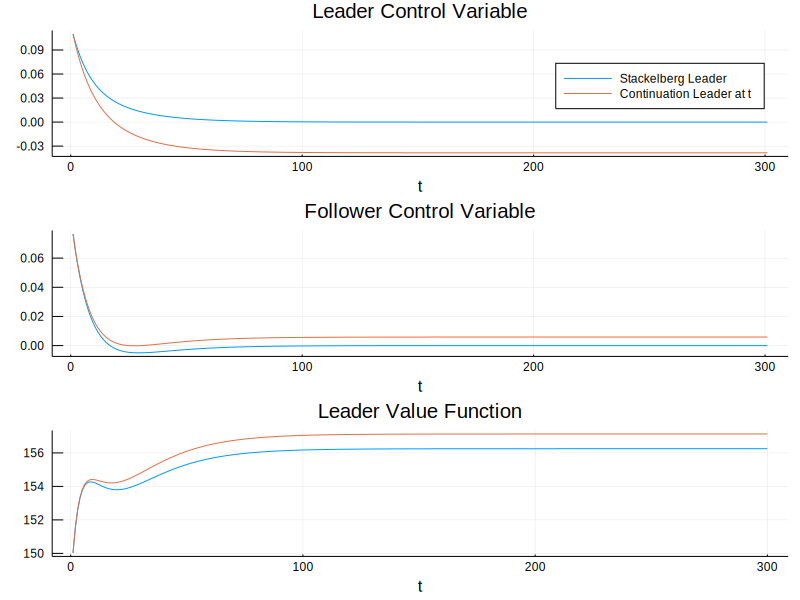

In [9]:
# Função de cálculo de valor ao longo do tempo com redefinição no tempo t
vt_leader = zeros(n);
vt_reset_leader = similar(vt_leader);

yt_reset = copy(yt)
yt_reset[end, :] = (H_0_0 * yt[1:3, :])

for t in 1:n
    vt_leader[t] = -yt[:, t]' * P * yt[:, t]
    vt_reset_leader[t] = -yt_reset[:, t]' * P * yt_reset[:, t]
end

p1 = plot(1:n+1, [(-F * yt)', (-F * yt_reset)'], labels = ["Stackelberg Leader", "Continuation Leader at t"],
        title = "Leader Control Variable", xlabel = "t");
p2 = plot(1:n+1, [yt[4, :], yt_reset[4, :]], title = "Follower Control Variable", xlabel = "t", legend = false);
p3 = plot(1:n, [vt_leader, vt_reset_leader], legend = false,
            xlabel = "t", title = "Leader Value Function");
plot(p1, p2, p3, layout = (3, 1), size = (800, 600))

## Formulação Recursiva do Problema do Seguidor

Agora, formulamos e computamos a versão recursiva do problema do seguidor.

Verificamos que a formulação recursiva **grande** $ K $ **, pequeno** $ k $ do problema do seguidor produz o mesmo caminho de produção
$ \vec q_1 $ que calculamos quando resolvemos o problema de Stackelberg

In [10]:
Ã = I + zeros(5, 5);
Ã[1:4, 1:4] .= A - B * F;
R̃ = [0 0 0 0 -a0/2; 0 0 0 0 a1/2; 0 0 0 0 0; 0 0 0 0 0; -a0/2 a1/2 0 0 a1];
Q̃ = Q;
B̃ = [0, 0, 0, 0, 1];

lq_tilde = QuantEcon.LQ(Q̃, R̃, Ã, B̃, bet=β);
P̃, F̃, d̃ = stationary_values(lq_tilde);
y0_tilde = vcat(y0, y0[3]);
yt_tilde = compute_sequence(lq_tilde, y0_tilde, n)[1];

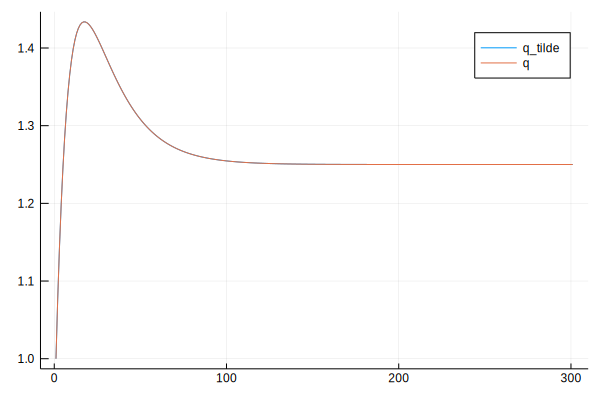

In [11]:
# verifica que a formulação recursiva do problema do seguidor dá
# a mesma solução que o problema original de Stackelberg
plot(1:n+1, [yt_tilde[5, :], yt_tilde[3, :]], labels = ["q_tilde", "q"])

Nota: Variáveis com `_tilde` são obtidas através da resolução dos
problema - aqueles sem são do problema de Stackelberg.

In [12]:
# diferença absoluta máxima em quantidades ao longo do tempo entre o primeiro e o segundo métodos de solução
max(abs(yt_tilde[5] - yt_tilde[3]))

0.0

In [13]:
# x0 == x0_tilde
yt[:, 1][end] - (yt_tilde[:, 2] - yt_tilde[:, 1])[end] < tol0

true

### Explicação do alinhamento

Se inspecionarmos os coeficientes na regra de decisão $ - \tilde F $,
podemos identificar o motivo pelo qual o seguidor escolhe definir $ x_t =
\tilde x_t $ quando define $ x_t = - \tilde F X_t $ na formulação recursiva do problema do seguidor.

Você consegue identificar quais recursos do $ \tilde F $ implicam isso?

Dica: lembre-se dos componentes de $ X_t $

In [14]:
F̃ #função de política no problema do seguidor

1×5 Array{Float64,2}:
 2.5489e-17  -3.18612e-18  -0.103187  -1.0  0.103187

In [15]:
P # função de valor no problema Stackelberg

4×4 Array{Float64,2}:
   963.541  -194.605   -511.622   -5258.23 
  -194.605    37.3536    81.9771    784.765
  -511.622    81.9771   247.343    2517.05 
 -5258.23    784.765   2517.05    25556.2  

In [16]:
P̃ # função de valor no problema do seguidor

5×5 Array{Float64,2}:
 -18.1991     2.58003     15.6049     151.23      -5.0   
   2.58003   -0.969466    -5.26008    -50.9764     1.0   
  15.6049    -5.26008    -32.2759    -312.792    -12.3824
 151.23     -50.9764    -312.792    -3031.33    -120.0   
  -5.0        1.0        -12.3824    -120.0       14.3824

In [17]:
# verifique manualmente se P é um ponto fixo aproximado
all((P  - ((R + F' * Q * F) + β * (A - B * F)' * P * (A - B * F)) .< tol0))

true

In [18]:
# calcule `P_guess` usando `F_tilde_star`
F̃_star = -[0, 0, 0, 1, 0]';
P_guess = zeros(5, 5);

for i in 1:1000
    P_guess = ((R̃ + F̃_star' * Q̃ * F̃_star) +
               β * (Ã - B̃ * F̃_star)' * P_guess
               * (Ã - B̃ * F̃_star));
end

In [19]:
# função de valor no problema do seguidor
-(y0_tilde' * P̃ * y0_tilde)[1, 1]

112.65590740578102

In [20]:
# função de valor usando P_guess
-(y0_tilde' * P_guess * y0_tilde)[1, 1]

112.65590740578097

In [21]:
# política c usando o algoritmo de iteração de política
F_iter = (β * inv(Q + β * B̃' * P_guess * B̃)
      * B̃' * P_guess * Ã);
P_iter = zeros(5, 5);
dist_vec = zeros(5, 5);

for i in 1:100
    # compute P_iter
    dist_vec = similar(P_iter)
    for j in 1:1000
        P_iter = (R̃ + F_iter' * Q * F_iter) + β *
                  (Ã - B̃ * F_iter)' * P_iter *
                  (Ã - B̃ * F_iter);

        # atualize F_iter
        F_iter = β * inv(Q + β * B̃' * P_iter * B̃) *
                    B̃' * P_iter * Ã;

        dist_vec = P_iter - ((R̃ + F_iter' * Q * F_iter) +
                β * (Ã - B̃ * F_iter)' * P_iter *
                (Ã - B̃ * F_iter));
    end
end

if maximum(abs.(dist_vec)) < 1e-8
    dist_vec2 = F_iter - (β * inv(Q + β * B̃' * P_iter * B̃) * B̃' * P_iter * Ã)
        if maximum(abs.(dist_vec2)) < 1e-8
            @show F_iter
        else
            println("The policy didn't converge: try increasing the number of outer loop iterations")
        end
else
    println("The policy didn't converge: try increasing the number of inner loop iterations")
end

F_iter = [0.0 -1.474514954580286e-17 -0.1031865014522383 -1.0000000000000007 0.10318650145223823]


1×5 Adjoint{Float64,Array{Float64,1}}:
 0.0  -1.47451e-17  -0.103187  -1.0  0.103187

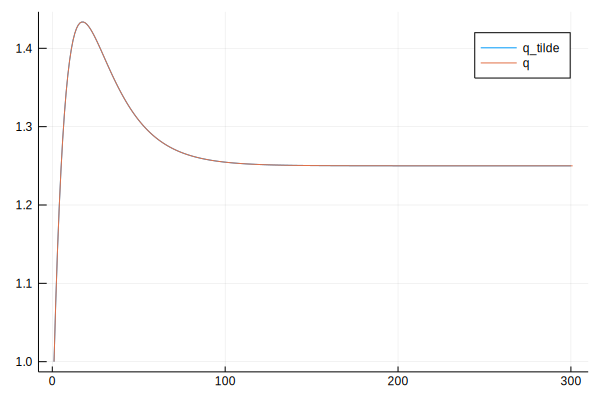

In [22]:
yt_tilde_star = zeros(n, 5);
yt_tilde_star[1, :] = y0_tilde;

for t in 1:n-1
    yt_tilde_star[t+1, :] = (Ã - B̃ * F̃_star) * yt_tilde_star[t, :];
end

plot([yt_tilde_star[:, 5], yt_tilde[3, :]], labels = ["q_tilde", "q"])

In [23]:
maximum(abs.(yt_tilde_star[:, 5] - yt_tilde[3, 1:end-1]))

0.0

## Equilíbrio Perfeito de Markov

O vetor de **estado** é

$$
z_t = \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t} \end{bmatrix}
$$

e a dinâmica de transição de estado são

$$
z_{t+1} = A z_t + B_1 v_{1t}  +  B_2 v_{2t}
$$

onde $ A $ é uma matriz identidade $ 3 \times 3 $ e

$$
B_1 = \begin{bmatrix} 0 \cr 0 \cr 1 \end{bmatrix} ,
\quad B_2 = \begin{bmatrix} 0 \cr 1 \cr 0 \end{bmatrix}
$$

As regras de decisão perfeita de Markov são

$$
v_{1t} = - F_1 z_t , \quad v_{2t} = - F_2 z_t
$$

e no equilíbrio perfeito de Markov, o estado evolui de acordo com

$$
z_{t+1} = (A - B_1 F_1 - B_2 F_2) z_t
$$

In [24]:
# na forma LQ 
A = I + zeros(3, 3);
B1 = [0, 0, 1];
B2 = [0, 1, 0];
R1 = [0 0 -a0/2; 0 0 a1/2; -a0/2 a1/2 a1];
R2 = [0 -a0/2 0; -a0/2 a1 a1/2; 0 a1/2 0];
Q1 = Q2 = γ;
S1 = S2 = W1 = W2 = M1 = M2 = 0.;

# resolvendo usando nnash disponivel em QE
F1, F2, P1, P2 = nnash(A, B1, B2, R1, R2, Q1, Q2,
                        S1, S2, W1, W2, M1, M2,
                        beta = β,
                        tol = tol1);

# simulando a frente
AF = A - B1 * F1 - B2 * F2;
z = zeros(3, n);
z[:, 1] .= 1;
for t in 1:n-1
    z[:, t+1] = AF * z[:, t]
end

println("Policy for F1 is $F1")
println("Policy for F2 is $F2")

Policy for F1 is [-0.22701362843207126 0.03129874118441059 0.09447112842804818]
Policy for F2 is [-0.22701362843207126 0.09447112842804818 0.03129874118441059]


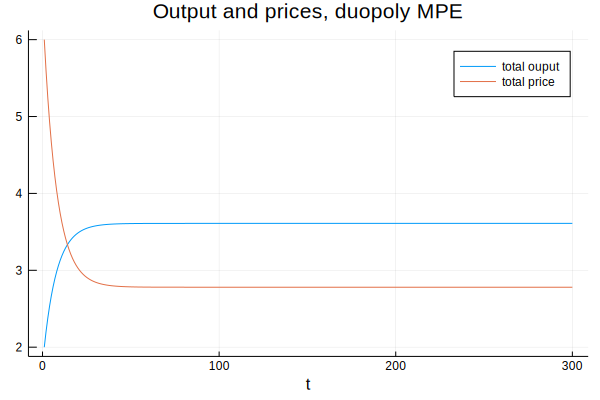

In [25]:
q1 = z[2, :];
q2 = z[3, :];
q = q1 + q2; # produto total, MPE
p = a0 .- a1 * q; # preço total, MPE
plot([q, p], labels = ["total ouput", "total price"], title = "Output and prices, duopoly MPE", xlabel = "t")

In [26]:
# calcula a diferença máxima em quantidades entre empresas
maximum(abs.(q1 - q2))

8.881784197001252e-16

In [27]:
# compute values
u1 = -F1 * z;
u2 = -F2 * z;
π_1 = (p .* q1)' - γ * u1.^2;
π_2 = (p .* q2)' - γ * u2.^2;

v1_forward = π_1 * βs;
v2_forward = π_2 * βs;

v1_direct = -z[:, 1]' * P1 * z[:, 1];
v2_direct = -z[:, 1]' * P2 * z[:, 1];

println("Firm 1: Direct is $v1_direct, Forward is $(v1_forward[1])");
println("Firm 2: Direct is $v2_direct, Forward is $(v2_forward[1])");

Firm 1: Direct is 133.3295555721595, Forward is 133.33033197956638
Firm 2: Direct is 133.32955557215945, Forward is 133.33033197956638


In [28]:
# sanity check
Λ_1 = A - B2 * F2;
lq1 = QuantEcon.LQ(Q1, R1, Λ_1, B1, bet = β);
P1_ih, F1_ih, d = stationary_values(lq1);

v2_direct_alt = -z[:, 1]' * P1_ih * z[:, 1] + d;
all(abs.(v2_direct - v2_direct_alt) < tol2)

true

## MPE vs. Stackelberg

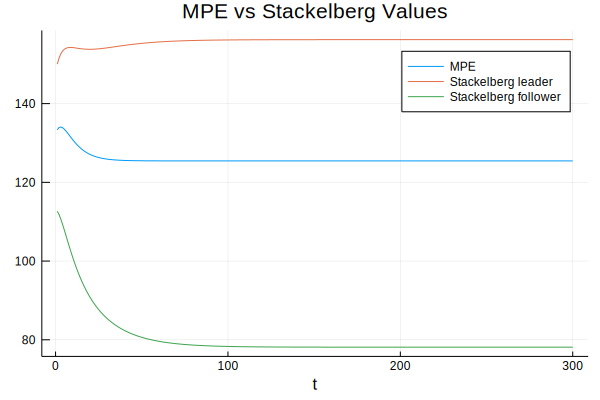

In [29]:
vt_MPE = zeros(n);
vt_follower = zeros(n);

for t in 1:n
    vt_MPE[t] = -z[:, t]' * P1 * z[:, t];
    vt_follower[t] = -yt_tilde[:, t]' * P̃ * yt_tilde[:, t];
end

plot([vt_MPE, vt_leader, vt_follower], labels = ["MPE", "Stackelberg leader",
        "Stackelberg follower"], title = "MPE vs Stackelberg Values",
        xlabel = "t")

In [30]:
# exibe valores
println("vt_leader(y0) = $(vt_leader[1])");
println("vt_follower(y0) = $(vt_follower[1])")
println("vt_MPE(y0) = $(vt_MPE[1])");

vt_leader(y0) = 150.03237147548847
vt_follower(y0) = 112.65590740578102
vt_MPE(y0) = 133.3295555721595


In [31]:
# diferença total no valor b/t Stackelberg e MPE
vt_leader[1] + vt_follower[1] - 2*vt_MPE[1]

-3.9708322630494877